In [1]:
import numpy as np
import pandas as pd

Работа со встроенными наборами данных в Scikit-learn

Набор данных Boston House Price

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Данные о недвижимости

In [8]:
data = boston.data

In [9]:
data.shape

(506, 13)

In [10]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

target - величина.ю которую требуется предсказать

In [11]:
target = boston.target

Названия признаков

In [12]:
feature_names = boston.feature_names

In [13]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Описание датасета

In [14]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Создадим два датафрейма

In [15]:
X = pd.DataFrame(data, columns=feature_names)

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
X.shape

(506, 13)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [19]:
y = pd.DataFrame(target, columns=['price'])

In [20]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбиение данных на тренировочные и тестовые датасеты

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Построение модели линейной регрессии

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

Задача линейной регрессии - найти подходящие коэфициэнты w

при признаках x для вычисления целевой переменной y,

минимизируя ошибку e:
    
y = w0 + w1 * x1 + w2 * x2 + ... wm * xm + e

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [29]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


Метрики оценки качества регриссионных моделей

средняя квадратичная ошибка

In [31]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [32]:
check_test.head(10)

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641
76,20.0,23.213983,3.213983
316,17.8,17.593112,-0.206888
140,14.0,14.305081,0.305081
471,19.6,23.054390,3.454390
500,16.8,20.620083,3.820083


In [33]:
initial_mse = (check_test['error'] **2).mean()
initial_mse

22.098694827097912

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827097912

Средняя абсолютная ошибка

In [36]:
(np.abs(check_test['error'])).mean()

3.060939595437019

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mean_absolute_error(y_test, y_pred)

3.060939595437019

R2

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test, y_pred)

0.6844267283527141

Просмотр коэффициентов линейной регрессии

w0

In [42]:
lr.intercept_

array([29.83642016])

w1 ... wm

In [43]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InLineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

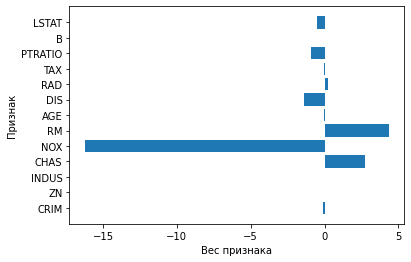

In [45]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [46]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Стандартизация признаков

При стандартизации от признака нужно отнять

среднее и поделить на среднеквадратичное отклонение


Применим стандартизацию

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)

In [51]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [52]:
X_test_scaled = scaler.transform(X_test)

In [53]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [54]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

Text(0, 0.5, 'Признак')

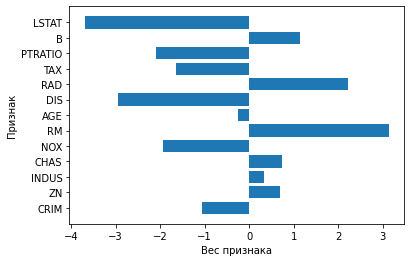

In [56]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [57]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [58]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred=model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [59]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

21.790249416475245

In [60]:
initial_mse

22.098694827097912

Модели линейной регрессии с регуляризацией

In [61]:
from sklearn.linear_model import Lasso, Ridge

Lasso (линейная регрессия с L1 регуляризацией)

In [62]:
# Параметр альфа отвечает за регуляризацию, чем больше, тем сильнее регуляризация
model = Lasso(alpha=0.003)

In [63]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.811408732029218

In [64]:
model = Ridge(alpha=0.001)

In [65]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.790278352569825

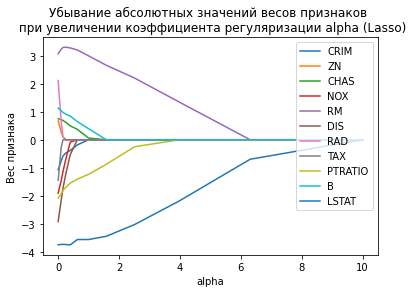

In [66]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha = val)
    lasso.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков \n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

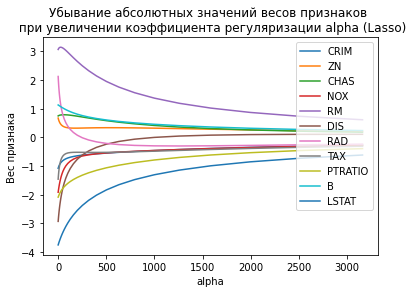

In [67]:
n = 66
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha = val)
    ridge.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков \n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)